# Creating paths with MetaPost-like parameters

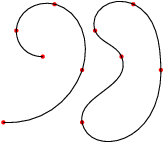

In [1]:
from pyx import *
from pyx.metapost.path import beginknot, endknot, smoothknot, tensioncurve

p1, p2, p3, p4, p5 = (0, 0), (2, 1.33), (1.3, 3), (0.33, 2.33), (1, 1.67)
openpath = metapost.path.path([
    beginknot(*p1), tensioncurve(), smoothknot(*p2), tensioncurve(),
    smoothknot(*p3), tensioncurve(), smoothknot(*p4), tensioncurve(),
    endknot(*p5)])
closedpath = metapost.path.path([
    smoothknot(*p1), tensioncurve(), smoothknot(*p2), tensioncurve(),
    smoothknot(*p3), tensioncurve(), smoothknot(*p4), tensioncurve(),
    smoothknot(*p5), tensioncurve()])
c = canvas.canvas()
for p in [p1, p2, p3, p4, p5]:
    c.fill(path.circle(p[0], p[1], 0.05), [color.rgb.red])
    c.fill(path.circle(p[0], p[1], 0.05), [color.rgb.red, trafo.translate(2, 0)])
c.stroke(openpath)
c.stroke(closedpath, [trafo.translate(2, 0)])

c

Some simple paths are created by prescribing five points on the path. The
curves between them are automatically chosen such that the result looks smooth. 

Instead of constructing paths from their path elements, where all control
points must be given explicitly, we here specify only five points which must
lie on the path. The remaining control points are then internally determined by
the constraint that the curve should look smooth.

In the first curve, the geometrical constraints are the following. The three
interior points have a continuous tangent and a continuous curvature. The two
end points demand a curvature not too different from that at their neighbor
(second/fourth point).

For the closed curve, all points are of the continuous type.

<img src="http://pyx.sourceforge.net/bend.png" align="left"> The algorithm for calculating the curves comes from MetaPost. In the syntax
of MetaPost, the above example corresponds to the commands

  draw((0,0)..(2,1.33)..(1.3,3)..(0.33,2.33)..(1,1.67));
  draw((0,0)..(2,1.33)..(1.3,3)..(0.33,2.33)..(1,1.67)..cycle);

